In [2]:
!pip install networkx

  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.2 MB/s eta 0:00:00a 0:00:01


In [51]:
import networkx as nx
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

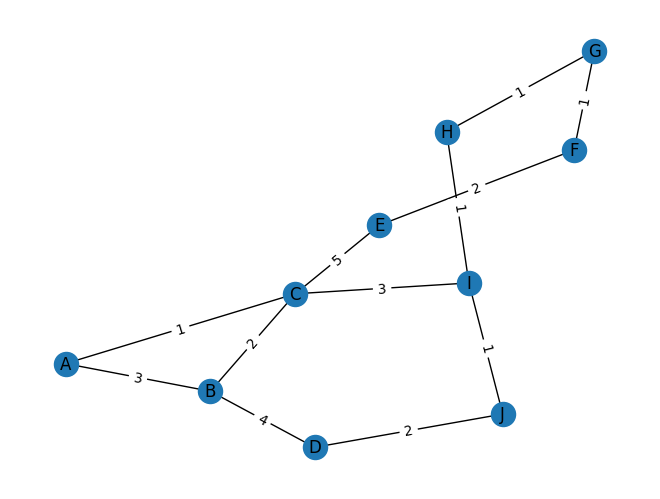

In [ ]:
# ----- Undirected weighted graph G -----

# create empty undirected graph
G = nx.Graph()

# add all 10 nodes
G.add_nodes_from(['A','B','C','D','E','F','G','H','I','J'])

# edge list with weights (u, v, w)
edges_G = [
    ('A', 'B', 3),
    ('A', 'C', 1),
    ('B', 'C', 2),
    ('B', 'D', 4),
    ('C', 'E', 5),
    ('E', 'F', 2),
    ('F', 'G', 1),
    ('G', 'H', 1),
    ('H', 'I', 1),
    ('I', 'J', 1),
    ('D', 'J', 2),
    ('C', 'I', 3)
]

# add weighted edges
G.add_weighted_edges_from(edges_G)

# draw G with edge weights
# Use spring_layout but tweak parameters to spread things out
pos = nx.spring_layout(G, seed=7, k=0.8, iterations=200)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


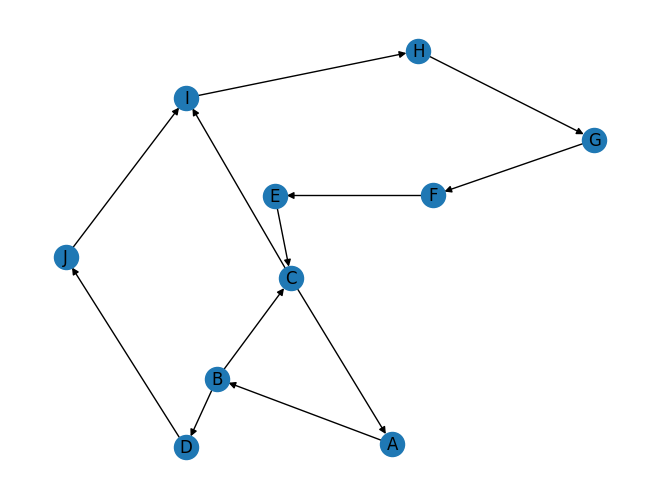

In [42]:
# ----- Directed graph D -----

# create empty directed graph
D = nx.DiGraph()

D.add_nodes_from(['A','B','C','D','E','F','G','H','I','J'])

# directed edges (unweighted)
edges_D = [
    ('A', 'B'),
    ('B', 'C'),
    ('C', 'A'),
    ('B', 'D'),
    ('D', 'J'),
    ('J', 'I'),
    ('I', 'H'),
    ('H', 'G'),
    ('G', 'F'),
    ('F', 'E'),
    ('E', 'C'),
    ('C', 'I')
]

D.add_edges_from(edges_D)

# draw D
pos = nx.spring_layout(D, seed=5, k=0.8, iterations=200)
nx.draw(D, pos, with_labels=True, arrows=True)
plt.show()

In [13]:
# Check for self-loops
list(nx.selfloop_edges(G))

[]

In [14]:
# Check for multi-edges
len(G.edges()) == len(set(map(frozenset, G.edges())))

True

In [15]:
# Check for self-loops
list(nx.selfloop_edges(D))

[]

In [16]:
# Check for multi-edges
len(D.edges()) == len(set(map(frozenset, D.edges())))

True

In [17]:

nx.is_bipartite(G)

False

In [19]:

nx.is_bipartite(D.to_undirected())

False

In [20]:
# ------------------------------
# For G, Degree of each node (ignore weights)
# ------------------------------
degrees = dict(G.degree())
print("Degrees (unweighted):")
print(degrees)

Degrees (unweighted):
{'A': 2, 'B': 3, 'C': 4, 'D': 2, 'E': 2, 'F': 2, 'G': 2, 'H': 2, 'I': 3, 'J': 2}


In [21]:
# degree sequence sorted descending
degree_sequence = sorted(degrees.values(), reverse=True)
print("\nDegree sequence (descending):")
print(degree_sequence)


Degree sequence (descending):
[4, 3, 3, 2, 2, 2, 2, 2, 2, 2]


In [22]:
# ------------------------------
# For G, Weighted degree (strength) of each node
# ------------------------------
weighted_degrees = dict(G.degree(weight='weight'))
print("\nWeighted degrees (strength):")
print(weighted_degrees)


Weighted degrees (strength):
{'A': 4, 'B': 9, 'C': 11, 'D': 6, 'E': 7, 'F': 3, 'G': 2, 'H': 2, 'I': 5, 'J': 3}


In [43]:
# ------------------------------
# For D, Compute in-degree and out-degree
# ------------------------------
data = []
for node in D.nodes():
    data.append([node, D.in_degree(node), D.out_degree(node)])

# Make a table
df = pd.DataFrame(data, columns=['node','in_deg','out_deg'])
print(df)

  node  in_deg  out_deg
0    A       1        1
1    B       1        2
2    C       2        2
3    D       1        1
4    E       1        1
5    F       1        1
6    G       1        1
7    H       1        1
8    I       2        1
9    J       1        1


In [25]:
nx.is_connected(G)

True

In [27]:
# For G, find the largest connected component
components = list(nx.connected_components(G))
giant = max(components, key=len)
len(giant)  


10

In [28]:
# Calculate average clustering coefficient for G
nx.average_clustering(G)

0.15

In [44]:
# Compute strongly and weakly connected components for D
# Strongly connected components
sccs = list(nx.strongly_connected_components(D))
print("Number of SCCs:", len(sccs))
print("Largest SCC:", max(sccs, key=len))

# Weakly connected components
wccs = list(nx.weakly_connected_components(D))
print("Number of WCCs:", len(wccs))
print("Largest WCC:", max(wccs, key=len))

Number of SCCs: 1
Largest SCC: {'C', 'A', 'B', 'G', 'F', 'E', 'H', 'I', 'D', 'J'}
Number of WCCs: 1
Largest WCC: {'C', 'A', 'B', 'G', 'F', 'E', 'H', 'I', 'D', 'J'}


In [40]:
# For G, all unweighted shortest paths from A to J
paths = list(nx.all_shortest_paths(G, source='A', target='J'))
distance = nx.shortest_path_length(G, source='A', target='J')

print("All shortest paths (unweighted):")
for p in paths:
    print(p)

print("\nShortest-path distance (unweighted):", distance)

All shortest paths (unweighted):
['A', 'B', 'D', 'J']
['A', 'C', 'I', 'J']

Shortest-path distance (unweighted): 3


In [38]:
# For G, shortest path from A to J (weighted)
path_weighted = nx.shortest_path(G, 'A', 'J', weight='weight')
dist_weighted = nx.shortest_path_length(G, 'A', 'J', weight='weight')
print(path_weighted, dist_weighted)

['A', 'C', 'I', 'J'] 5


In [41]:
# For G, compute the diameter of the largest connected component and average shortest path length (unweighted).
# Diameter (longest shortest-path distance)
diam = nx.diameter(G)
print("Diameter:", diam)

# Average shortest path length
avg_dist = nx.average_shortest_path_length(G)
print("Average shortest path length:", avg_dist)

Diameter: 4
Average shortest path length: 2.2222222222222223


In [46]:
# For D, check if there is a path from A to E and find the shortest path if it exists
nx.has_path(D, 'A', 'E')

True

In [47]:
nx.shortest_path(D, 'A', 'E')

['A', 'B', 'C', 'I', 'H', 'G', 'F', 'E']

In [48]:
# For G, compute degree centrality, betweenness centrality, and closeness centrality
deg_cent = nx.degree_centrality(G)              # degree centrality
bet_cent = nx.betweenness_centrality(G)        # betweenness (unweighted)
close_cent = nx.closeness_centrality(G)        # closeness (unweighted)

def top3(d):
    return sorted(d.items(), key=lambda x: x[1], reverse=True)[:3]

print("Top-3 degree centrality:", top3(deg_cent))
print("Top-3 betweenness:", top3(bet_cent))
print("Top-3 closeness:", top3(close_cent))

Top-3 degree centrality: [('C', 0.4444444444444444), ('B', 0.3333333333333333), ('I', 0.3333333333333333)]
Top-3 betweenness: [('C', 0.4444444444444444), ('I', 0.3472222222222222), ('E', 0.18055555555555555)]
Top-3 closeness: [('C', 0.6), ('I', 0.5625), ('B', 0.47368421052631576)]


In [49]:
# For D, compute PageRank and eigenvector centrality
pr = nx.pagerank(D)                           
eig = nx.eigenvector_centrality_numpy(D)       # eigenvector centrality for directed graph

def top3(d):
    return sorted(d.items(), key=lambda x: x[1], reverse=True)[:3]

print("Top-3 PageRank:", top3(pr))
print("Top-3 eigenvector:", top3(eig))

Top-3 PageRank: [('C', 0.14511064727256828), ('I', 0.12487695185747437), ('H', 0.12114639669748287)]
Top-3 eigenvector: [('I', 0.47170373022705525), ('C', 0.3948343808348203), ('H', 0.38736700105626)]


In [50]:
# average degree of G
deg_G = dict(G.degree())
k_G = sum(deg_G.values()) / len(deg_G)  
print("Average degree of G:", k_G)

Average degree of G: 2.4


Average degree G_ER: 2.52
Average degree G_BA: 1.98


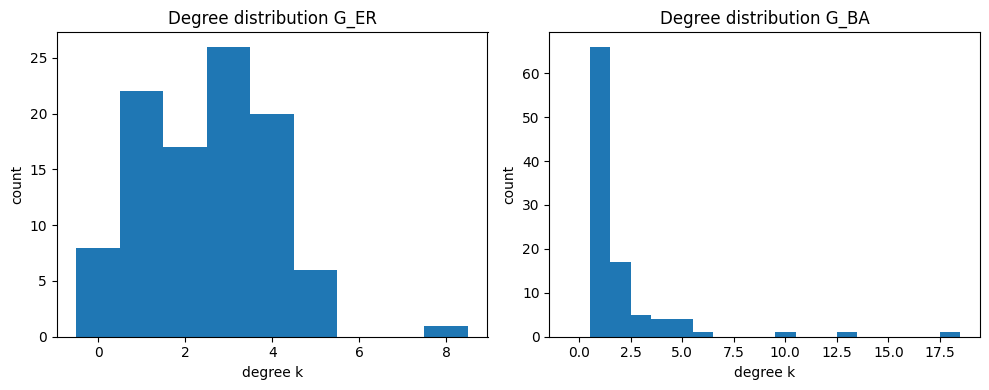


Average clustering G_ER: 0.04135714285714285
Average clustering G_BA: 0.0


In [55]:
n = 100
p = k_G / (n - 1)  
m = int(k_G / 2)

# random graphs
GER = nx.erdos_renyi_graph(n, p, seed=0)
GBA = nx.barabasi_albert_graph(n, m, seed=0)

# degrees
deg_GER = [d for _, d in GER.degree()]
deg_GBA = [d for _, d in GBA.degree()]

print("Average degree G_ER:", sum(deg_GER)/n)
print("Average degree G_BA:", sum(deg_GBA)/n)

# degree distributions
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(deg_GER, bins=range(0, max(deg_GER)+2), align='left')
plt.xlabel("degree k"); plt.ylabel("count")
plt.title("Degree distribution G_ER")

plt.subplot(1,2,2)
plt.hist(deg_GBA, bins=range(0, max(deg_GBA)+2), align='left')
plt.xlabel("degree k"); plt.ylabel("count")
plt.title("Degree distribution G_BA")

plt.tight_layout()
plt.show()

# average clustering coefficients
C_ER = nx.average_clustering(GER)
C_BA = nx.average_clustering(GBA)
print("\nAverage clustering G_ER:", C_ER)
print("Average clustering G_BA:", C_BA)
